In [1]:
import pandas as pd
from classes import *
from pre_analysis import *

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [15, 15]
plt.rcParams['figure.dpi'] = 150

In [2]:
# Loading the dataset
data_file = "transportation_network_providers.csv"
n_rows = 500
cdata = pd.read_csv(data_file, nrows=n_rows, index_col=0)

# Choosing variables to analyze
col_names = {'Trip Seconds': "seconds", 'Trip Miles': "miles", 
             'Tip': "tip", 'Trip Total': "total"}
variables = {name: Variable(col, name) 
        for col, name in col_names.items()}

In [3]:
# Checking for duplicate entries
assert cdata.append(cdata).shape[0] == 2 * cdata.shape[0]

In [12]:
# Checking for number of Null entries in rows
{c: cdata.isnull().sum()[c] for c in col_names.keys()}

{'Trip Seconds': 0, 'Trip Miles': 0, 'Tip': 0, 'Trip Total': 0}

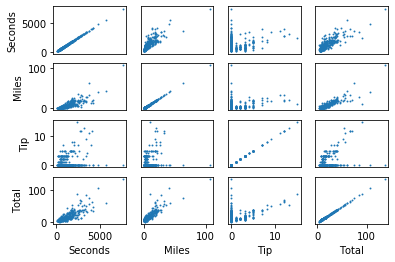

In [13]:
# Visualize pairwise scatter-plots
scatter_grid(cdata, variables)

In [14]:
# Correlation between variables
correlation_matrix(cdata, col_names)

,Trip Seconds,Trip Miles,Tip,Trip Total
Trip Seconds,1.000000,0.834853,0.264629,0.833014
Trip Miles,0.834853,1.000000,0.241811,0.885580
Tip,0.264629,0.241811,1.000000,0.461244
Trip Total,0.833014,0.885580,0.461244,1.000000


In [11]:
cdata.tail(3)

,Trip Start Timestamp,Trip End Timestamp,Trip Seconds,Trip Miles,Pickup Census Tract,Dropoff Census Tract,Pickup Community Area,Dropoff Community Area,Fare,Tip,...,Trip Total,Shared Trip Authorized,Trips Pooled,Pickup Centroid Latitude,Pickup Centroid Longitude,Pickup Centroid Location,Dropoff Centroid Latitude,Dropoff Centroid Longitude,Dropoff Centroid Location,Philanthrophic
Trip ID,,,,,,,,,,,,,,,,,,,,,
d1b85391b5b43d23968686fcda13407a38f72a38,07/14/2019 03:45:00 PM,07/14/2019 04:00:00 PM,1116,2.4,1.703124e+10,1.703107e+10,24.0,7.0,7.5,0,...,10.05,False,1,41.906026,-87.675312,POINT (-87.6753116216 41.906025969),41.914616,-87.631717,POINT (-87.6317173661 41.9146162864),No
d1b854cf4a48b6765c54cc05dde5840c38928e45,08/14/2019 09:45:00 AM,08/14/2019 10:00:00 AM,861,3.4,1.703108e+10,1.703133e+10,8.0,33.0,7.5,3,...,18.05,False,1,41.895033,-87.619711,POINT (-87.6197106717 41.8950334495),41.859350,-87.617358,POINT (-87.6173580061 41.859349715),Yes
d1b8565c3256b3f5324eb0f7a7d3e96724774f44,07/30/2019 10:30:00 PM,07/30/2019 10:30:00 PM,666,3.5,1.703184e+10,1.703124e+10,32.0,24.0,7.5,0,...,10.05,False,1,41.871016,-87.631407,POINT (-87.6314065252 41.8710158803),41.892433,-87.669624,POINT (-87.6696239301 41.8924331563),No


(63, 20)

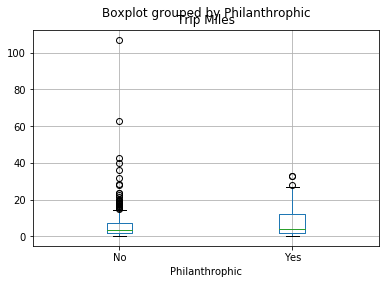

In [9]:
# Some 'practice' code

# Percentage of people who didn't tip
cdata[cdata['Tip'] == 0.0].shape

# People who traveled for over an hour or over 10 miles, but didn't tip
long_travel = (cdata['Trip Seconds'] >= 3600) | (cdata["Trip Miles"] >= 10)
no_tip = cdata["Tip"] == 0.0
subset = cdata[ (long_travel) & (no_tip)]
subset.shape

# --------------

def tip_fn(tip):
    if tip == 0.0:
        return "No"
    else:
        return "Yes"
    
cdata["Philanthrophic"] = cdata["Tip"].apply(tip_fn)
cdata.boxplot(column='Trip Miles',
             by="Philanthrophic")